# Auto Regressor

## ARIMA Model Architecture for Stock Price Prediction

### Model Architecture
**Model:** ARIMA (AutoRegressive Integrated Moving Average)

- **Order:** (4, 1, 0)
  - **AutoRegressive (AR) Order:** 4
  - **Differencing (I) Order:** 1
  - **Moving Average (MA) Order:** 0

### Why ARIMA is Useful

The ARIMA model is popular for predicting time-based data because it can handle different patterns and trends. Here’s why it’s so useful:

- **Autoregressive Component (AR)**: 
  - This part looks at how current data points relate to past data points. By considering several past values, the AR part can identify and model complex patterns and trends in the data.

- **Integrated Component (I)**:
  - This part deals with making the data stationary, meaning it removes trends and seasonality to make the data more stable. Stable data is easier to predict accurately.

- **Moving Average Component (MA)**:
  - This part looks at the relationship between current data points and past errors (or noise). By doing so, it helps smooth out the data and captures short-term patterns.

- **Flexibility**:
  - ARIMA can be customized to fit many different types of time-based data by adjusting its parameters. This makes it a versatile tool for forecasting in various fields like finance and economics.

- **Performance**:
  - By combining AR, I, and MA components, ARIMA models can make accurate predictions. They account for patterns and trends in the data, making the forecasts more reliable.

For example, the ARIMA(4, 1, 0) model for predicting TATAMOTORS stock prices uses four past values, adjusts for trends with a first-order difference, and doesn’t use any moving average terms. This specific setup works well for the characteristics of the TATAMOTORS stock price data.




C:\Users\iamha\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\iamha\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\iamha\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\iamha\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\iamha\AppData\R

Testing Mean Squared Error is 3224.4427949880323
Testing Mean Absolute Error is 51.97890080393584


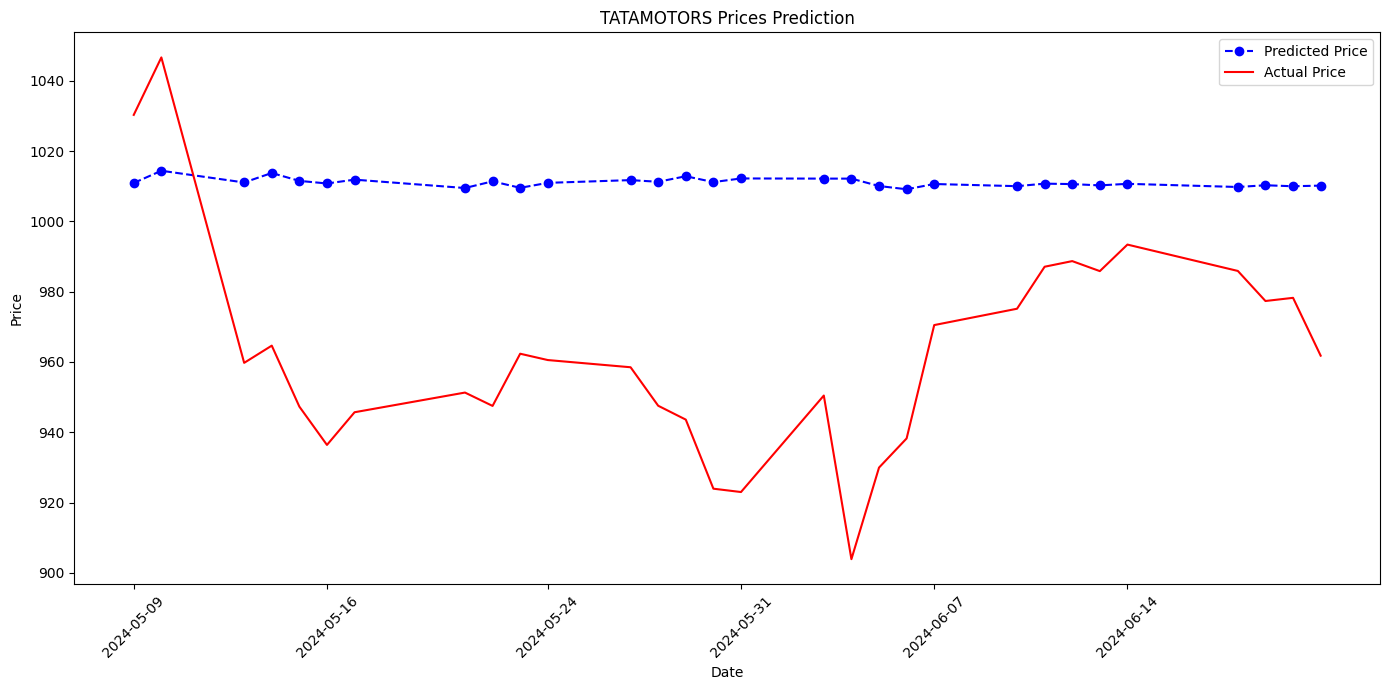

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

df = pd.read_csv("TATAMOTORS.NS2.csv")
df['Date'] = pd.to_datetime(df['Date'])  
df = df.dropna()


train_data, test_data = df[8000:8426], df[8426:]
training_data = train_data['Close'].values
test_data = test_data['Close'].values


history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)

# for time_point in range(N_test_observations):
#     model = ARIMA(history, order=(4, 1, 4))
#     model_fit = model.fit()
#     output = model_fit.forecast()
#     yhat = output[0]
#     model_predictions.append(yhat)
#     true_test_value = test_data[time_point]
#     history.append(true_test_value)

for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4, 1, 4))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(yhat)


MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))
MAE_error = mean_absolute_error(test_data, model_predictions)
print('Testing Mean Absolute Error is {}'.format(MAE_error))


test_set_range = df['Date'][8426:]


plt.figure(figsize=(14, 7))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed', label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('TATAMOTORS Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Price')

plt.xticks(ticks=test_set_range[::5], labels=test_set_range.dt.strftime('%Y-%m-%d')[::5], rotation=45)

plt.legend()
plt.tight_layout()
plt.show()


# TimeGAN Model

# VAE in TimeGAN

The VAE part of the TimeGAN model is used to encode the input time series data into a latent representation, which is then used by the Generator to produce realistic synthetic data. This latent representation helps in capturing the underlying structure and dependencies in the time series data.

## Generator (modelG)

### Architecture:

**GRU Layers:**
- `self.gru_1`: GRU layer with 512 units.
- `self.gru_2`: GRU layer with 256 units.
- `self.gru_3`: GRU layer with 128 units.

These layers capture temporal dependencies in the time series data, allowing the model to learn patterns over time.

**Linear Layers:**
- `self.linear_1`: Linear layer with 64 units.
- `self.linear_2`: Linear layer with 32 units.
- `self.linear_3`: Linear layer with 1 unit (output).

These layers project the GRU outputs to the final output space, generating the predicted time series data.

**Dropout:**
- `self.dropout`: Applied after GRU layers to prevent overfitting by randomly setting a fraction of input units to zero.

## Discriminator (modelD)

### Architecture:

**Convolutional Layers:**
- `self.conv1`: Convolutional layer with 16 filters.
- `self.conv2`: Convolutional layer with 32 filters.
- `self.conv3`: Convolutional layer with 64 filters.

These layers capture local patterns and features in the time series data.

**Linear Layers:**
- `self.linear1`: Linear layer with 128 units.
- `self.linear2`: Linear layer with 128 units.
- `self.linear3`: Linear layer with 1 unit (output).

These layers help in discriminating between real and fake sequences generated by the Generator.

**Batch Normalization:**
- `self.batch1` and `self.batch2`: Applied after the linear layers to stabilize learning and improve convergence by normalizing the input to each layer.

**Activation Functions:**
- `self.leaky`: Leaky ReLU for intermediate layers.
- `self.relu`: ReLU activation function before the final output layer.
- `self.sigmoid`: Sigmoid activation function for output to produce probabilities.

## Why This Architecture Is Useful

**Temporal Data Modeling:**
- The Generator uses GRU layers, which are well-suited for sequential data with temporal dependencies, making it effective for modeling time series data.

**Feature Extraction:**
- The Discriminator uses convolutional layers to extract meaningful features from the time series data. Convolutional layers are effective at capturing local patterns and anomalies.

**Adversarial Training:**
- The GAN setup with the Generator and Discriminator allows the model to improve over time through adversarial training. The Generator learns to produce more realistic sequences, while the Discriminator gets better at distinguishing real from fake.

**Regularization:**
- Dropout in the Generator helps prevent overfitting by introducing randomness during training, making the model more robust.

**End-to-End Learning:**
- The GAN framework facilitates end-to-end learning where the Generator and Discriminator are trained together, leading to improved performance in generating and discriminating time series data.


8463
[ 20.959597  20.959597  21.857864 ... 990.       980.       979.      ]
[ 20.959597  20.959597  21.857864 ... 990.       980.       979.      ]
trainX: (400,) trainY: (400,)
testX: (30,) testY: (30,)
[1/500] Loss: 135.1881194114685
[2/500] Loss: 133.50979232788086
[3/500] Loss: 131.80369901657104
[4/500] Loss: 130.0682806968689
[5/500] Loss: 128.29665756225586
[6/500] Loss: 126.47795009613037
[7/500] Loss: 124.65497779846191
[8/500] Loss: 122.85922908782959
[9/500] Loss: 121.07251644134521
[10/500] Loss: 119.35093021392822
[11/500] Loss: 117.74948930740356
[12/500] Loss: 116.33352994918823
[13/500] Loss: 114.90483951568604
[14/500] Loss: 113.46396732330322
[15/500] Loss: 112.02067804336548
[16/500] Loss: 110.76428604125977
[17/500] Loss: 109.59741306304932
[18/500] Loss: 108.48509740829468
[19/500] Loss: 107.36366081237793
[20/500] Loss: 106.22639751434326
[21/500] Loss: 105.06422519683838
[22/500] Loss: 103.91156101226807
[23/500] Loss: 102.75277376174927
[24/500] Loss: 101.61033

C:\Users\iamha\AppData\Local\Temp\ipykernel_5752\784460379.py:298: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  last_slice = torch.tensor(prediction_slide[-1]).float().to(device)
C:\Users\iamha\AppData\Local\Temp\ipykernel_5752\784460379.py:308: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  last_slice = torch.tensor(prediction_slide[-1]).float().to(device)


Training dataset RMSE:48.5073893705095
Training dataset RMSE: 48.5073893705095
Training dataset MAE: 34.747480448197436


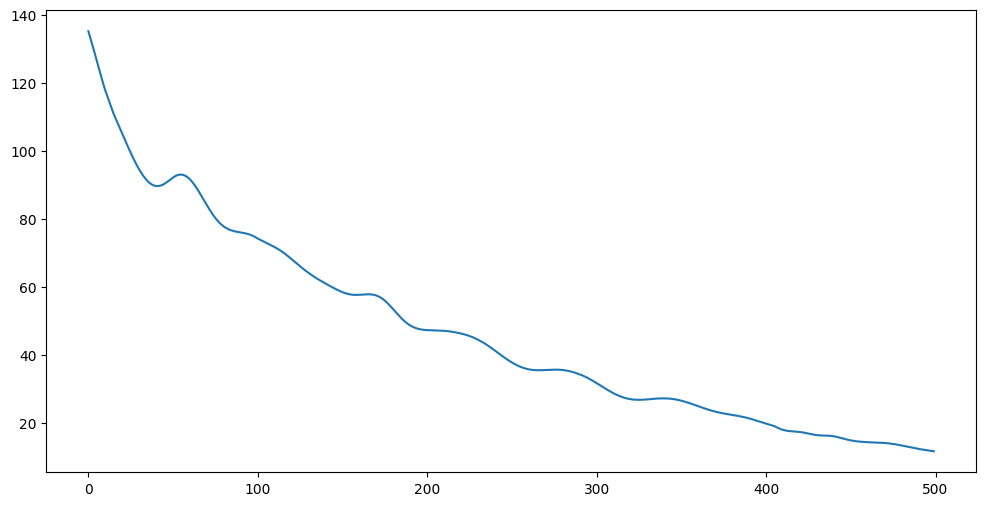

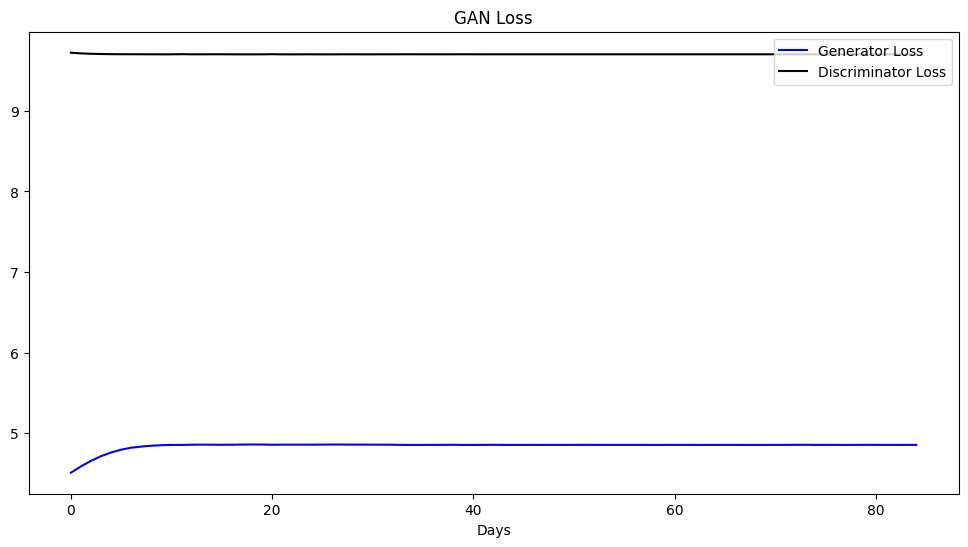

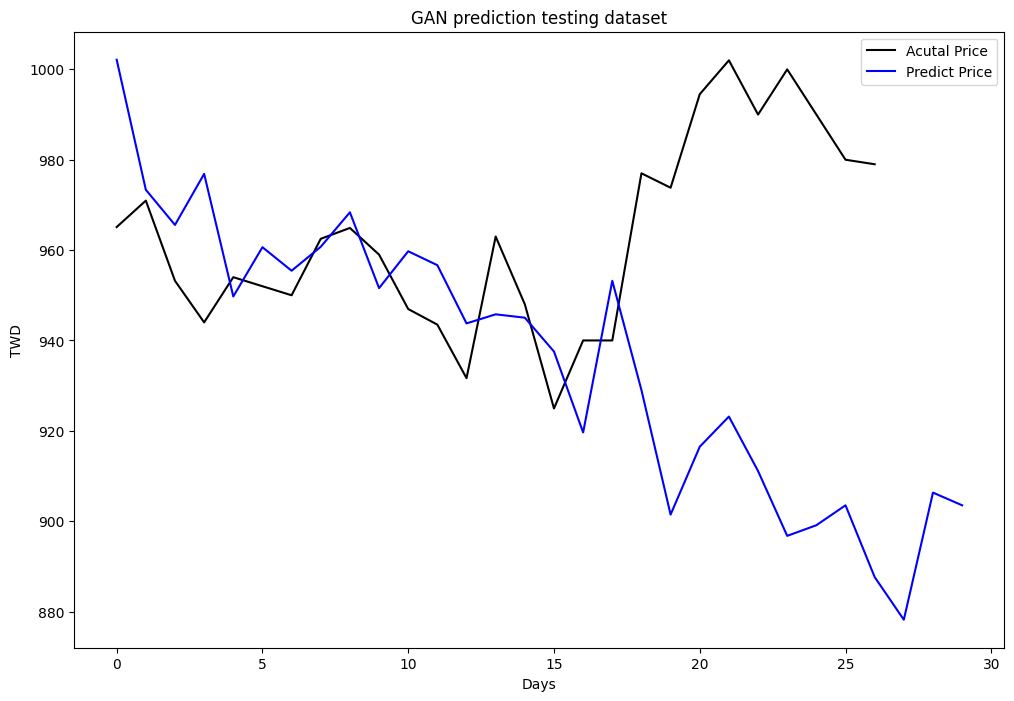

In [31]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import torch.optim as optim

data = pd.read_csv('TATAMOTORS.NS2.csv')
l=len(data)
print(l)
data = data.iloc[:, :]
data.dropna(inplace=True)
data['y'] = data['Close']

x = data.iloc[:, 1].values
y = data.iloc[:, 1].values
print(x)
print(y)
split = 8426
train_x, test_x = x[split - 400 : split, ], x[split:, ]
train_y, test_y = y[split - 400 : split, ], y[split: , ]

print(f'trainX: {train_x.shape} trainY: {train_y.shape}')
print(f'testX: {test_x.shape} testY: {test_y.shape}')

x_scaler = MinMaxScaler(feature_range = (0, 1))
y_scaler = MinMaxScaler(feature_range = (0, 1))

train_x = x_scaler.fit_transform(train_x.reshape(-1, 1))
test_x = x_scaler.transform(test_x.reshape(-1, 1))

train_y = y_scaler.fit_transform(train_y.reshape(-1, 1))
test_y = y_scaler.transform(test_y.reshape(-1, 1))
class VAE(nn.Module):
    def __init__(self, config, latent_dim):
        super().__init__()

        modules = []
        for i in range(1, len(config)):
            modules.append(
                nn.Sequential(
                    nn.Linear(config[i - 1], config[i]),
                    nn.ReLU()
                )
            )
        
        self.encoder = nn.Sequential(*modules)
        self.fc_mu = nn.Linear(config[-1], latent_dim)
        self.fc_var = nn.Linear(config[-1], latent_dim)

        modules = []
        self.decoder_input = nn.Linear(latent_dim, config[-1])

        for i in range(len(config) - 1, 1, -1):
            modules.append(
                nn.Sequential(
                    nn.Linear(config[i], config[i - 1]),
                    nn.ReLU()
                )
            )       
        modules.append(
            nn.Sequential(
                nn.Linear(config[1], config[0]),
                nn.Sigmoid()
            )
        ) 

        self.decoder = nn.Sequential(*modules)

    def encode(self, x):
        result = self.encoder(x)
        mu = self.fc_mu(result)
        logVar = self.fc_var(result)
        return mu, logVar

    def decode(self, x):
        result = self.decoder(x)
        return result

    def reparameterize(self, mu, logVar):
        std = torch.exp(0.5* logVar)
        eps = torch.randn_like(std)
        return eps * std + mu

    def forward(self, x):
        mu, logVar = self.encode(x)
        z = self.reparameterize(mu, logVar)
        output = self.decode(z)
        return output, z, mu, logVar
train_loader = DataLoader(TensorDataset(torch.from_numpy(train_x).float()), batch_size = 128, shuffle = False)
model = VAE([1, 128, 128, 128, 10], 10)
use_cuda = 1
device = torch.device("cuda" if (torch.cuda.is_available() & use_cuda) else "cpu")
num_epochs = 500
learning_rate = 0.00003
model = model.to(device)   
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

hist = np.zeros(num_epochs) 
for epoch in range(num_epochs):
    total_loss = 0
    loss_ = []
    for (x, ) in train_loader:
        x = x.to(device)
        output, z, mu, logVar = model(x)
        kl_divergence = 0.5* torch.sum(-1 - logVar + mu.pow(2) + logVar.exp())
        loss = F.binary_cross_entropy(output, x) + kl_divergence
        loss.backward()
        optimizer.step()
        loss_.append(loss.item())
    hist[epoch] = sum(loss_)
    print('[{}/{}] Loss:'.format(epoch+1, num_epochs), sum(loss_))

plt.figure(figsize=(12, 6))
plt.plot(hist)
model.eval()
_, VAE_train_x, train_x_mu, train_x_var = model(torch.from_numpy(train_x).float().to(device))
_, VAE_test_x, test_x_mu, test_x_var = model(torch.from_numpy(test_x).float().to(device))
def sliding_window(x, y, window):
    x_ = []
    y_ = []
    y_gan = []
    for i in range(window, x.shape[0]):
        tmp_x = x[i - window: i, :]
        tmp_y = y[i]
        tmp_y_gan = y[i - window: i + 1]
        x_.append(tmp_x)
        y_.append(tmp_y)
        y_gan.append(tmp_y_gan)
    x_ = torch.from_numpy(np.array(x_)).float()
    y_ = torch.from_numpy(np.array(y_)).float()
    y_gan = torch.from_numpy(np.array(y_gan)).float()
    return x_, y_, y_gan
train_x = np.concatenate((train_x, VAE_train_x.cpu().detach().numpy()), axis = 1)
test_x = np.concatenate((test_x, VAE_test_x.cpu().detach().numpy()), axis = 1)
train_x_slide, train_y_slide, train_y_gan = sliding_window(train_x, train_y, 3)
test_x_slide, test_y_slide, test_y_gan = sliding_window(test_x, test_y, 3)
print(f'train_x: {train_x_slide.shape} train_y: {train_y_slide.shape} train_y_gan: {train_y_gan.shape}')
print(f'test_x: {test_x_slide.shape} test_y: {test_y_slide.shape} test_y_gan: {test_y_gan.shape}')
class Generator(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.gru_1 = nn.GRU(input_size, 512, batch_first=True)
        self.gru_2 = nn.GRU(512, 256, batch_first=True)
        self.gru_3 = nn.GRU(256, 128, batch_first=True)
        self.linear_1 = nn.Linear(128, 64)
        self.linear_2 = nn.Linear(64, 32)
        self.linear_3 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        use_cuda = 1
        device = torch.device("cuda" if (torch.cuda.is_available() & use_cuda) else "cpu")
        h0 = torch.zeros(1, x.size(0), 512).to(device)
        out_1, _ = self.gru_1(x, h0)
        out_1 = self.dropout(out_1)
        h1 = torch.zeros(1, x.size(0), 256).to(device)
        out_2, _ = self.gru_2(out_1, h1)
        out_2 = self.dropout(out_2)
        h2 = torch.zeros(1, x.size(0), 128).to(device)
        out_3, _ = self.gru_3(out_2, h2)
        out_3 = self.dropout(out_3)
        out_4 = self.linear_1(out_3[:, -1, :])
        out_5 = self.linear_2(out_4)
        out = self.linear_3(out_5)
        return out
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv1d(4, 16, kernel_size=3, stride=1, padding='same')
        self.conv2 = nn.Conv1d(16, 32, kernel_size=3, stride=1, padding='same')
        self.conv3 = nn.Conv1d(32, 64, kernel_size=3, stride=1, padding='same')
        self.linear1 = nn.Linear(64, 128)
        self.batch1 = nn.BatchNorm1d(128)
        self.linear2 = nn.Linear(128, 128)
        self.batch2 = nn.BatchNorm1d(128)
        self.linear3 = nn.Linear(128, 1)
        self.leaky = nn.LeakyReLU(0.01)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        conv1 = self.conv1(x)
        conv1 = self.leaky(conv1)
        conv2 = self.conv2(conv1)
        conv2 = self.leaky(conv2)
        conv3 = self.conv3(conv2)
        conv3 = self.leaky(conv3)
        flatten_x = conv3.reshape(conv3.shape[0], conv3.shape[1])
        out_1 = self.linear1(flatten_x)
        out_1 = self.leaky(out_1)
        out_2 = self.linear2(out_1)
        out_2 = self.relu(out_2)
        out_3 = self.linear3(out_2)
        out = self.sigmoid(out_3)
        return out
use_cuda = 1
device = torch.device("cuda" if (torch.cuda.is_available() & use_cuda) else "cpu")

batch_size = 64
learning_rate = 0.00016
num_epochs = 85

trainDataloader = DataLoader(TensorDataset(train_x_slide, train_y_gan), batch_size = batch_size, shuffle = False)

modelG = Generator(11).to(device)
modelD = Discriminator().to(device)

criterion = nn.BCELoss()

optimizerG = torch.optim.Adam(modelG.parameters(), lr = learning_rate, betas = (0.5, 0.999))
optimizerD = torch.optim.Adam(modelD.parameters(), lr = learning_rate, betas = (0.5, 0.999))

histG = np.zeros(num_epochs)
histD = np.zeros(num_epochs)
count = 0
for epoch in range(num_epochs):
    loss_G = []
    loss_D = []
    for (x, y) in trainDataloader:
        x = x.to(device)
        y = y.to(device)

        fake_data = modelG(x)
        fake_data = torch.cat([y[:, :3, :], fake_data.reshape(-1, 1, 1)], axis = 1)

        dis_real_output = modelD(y)
        real_labels = torch.ones_like(dis_real_output).to(device)
        lossD_real = criterion(dis_real_output, real_labels)


        dis_fake_output = modelD(fake_data)
        fake_labels = torch.zeros_like(real_labels).to(device)
        lossD_fake = criterion(dis_fake_output, fake_labels)

        lossD = (lossD_real + lossD_fake)

        modelD.zero_grad()
        lossD.backward(retain_graph=True)
        optimizerD.step()
        loss_D.append(lossD.item())

        output_fake = modelD(fake_data)
        lossG = criterion(output_fake, real_labels)
        modelG.zero_grad()
        lossG.backward()
        optimizerG.step()
        loss_G.append(lossG.item()) 
    histG[epoch] = sum(loss_G) 
    histD[epoch] = sum(loss_D)    
    print(f'[{epoch+1}/{num_epochs}] LossD: {sum(loss_D)} LossG:{sum(loss_G)}')
plt.figure(figsize = (12, 6))
plt.plot(histG, color = 'blue', label = 'Generator Loss')
plt.plot(histD, color = 'black', label = 'Discriminator Loss')
plt.title('GAN Loss')
plt.xlabel('Days')
plt.legend(loc = 'upper right')

# # this commented part of code does not give recursive prediction:
# modelG.eval()
# pred_y_train = modelG(train_x_slide.to(device))
# pred_y_test = modelG(test_x_slide.to(device))

# y_train_true = y_scaler.inverse_transform(train_y_slide)
# y_train_pred = y_scaler.inverse_transform(pred_y_train.cpu().detach().numpy())

# y_test_true = y_scaler.inverse_transform(test_y_slide)
# y_test_pred = y_scaler.inverse_transform(pred_y_test.cpu().detach().numpy())



def sliding_window(data, window_size):
    shape = (data.shape[0] - window_size + 1, window_size) + data.shape[1:]
    strides = (data.strides[0],) + data.strides
    return np.lib.stride_tricks.as_strided(data, shape=shape, strides=strides)

modelG.eval()
print(train_x_slide.shape)
pred_y_train = modelG(train_x_slide.to(device))
print(type(train_x_slide))


prediction = []
prediction.append(train_x[-3])
prediction.append(train_x[-2])
prediction.append(train_x[-1])


prediction_slide = sliding_window(np.array(prediction), 3)
prediction_slide = torch.tensor(prediction_slide).float().to(device)


last_slice = torch.tensor(prediction_slide[-1]).float().to(device)


last_slice = last_slice.unsqueeze(0)


all_predictions = []

for i in range(len(test_x)):
    
    last_slice = torch.tensor(prediction_slide[-1]).float().to(device)

    
    last_slice = last_slice.unsqueeze(0)
    pred_y_test = modelG(last_slice)
    
    
    _, VAE_pred_y_test, pred_y_test_mu, pred_y_test_var = model(torch.from_numpy(pred_y_test.cpu().detach().numpy()).float().to(device))
    
    
    pred_y_test_np = pred_y_test.cpu().detach().numpy().flatten() 
    VAE_pred_y_test_np = VAE_pred_y_test.cpu().detach().numpy().flatten()  
    pp = np.concatenate((pred_y_test_np, VAE_pred_y_test_np))  
    
    
    prediction.append(pp)
    prediction_slide = sliding_window(np.array(prediction), 3)
    prediction_slide = torch.tensor(prediction_slide).float().to(device)
    
    
    all_predictions.append(pred_y_test_np)


all_predictions = np.array(all_predictions).squeeze()  


all_predictions = all_predictions.reshape(-1, 1)


y_train_true = y_scaler.inverse_transform(train_y_slide)
y_train_pred = y_scaler.inverse_transform(pred_y_train.cpu().detach().numpy())

y_test_true = y_scaler.inverse_transform(test_y_slide)
y_test_pred = y_scaler.inverse_transform(all_predictions)
plt.figure(figsize=(12, 8))
plt.plot(y_test_true, color = 'black', label = 'Acutal Price')
plt.plot(y_test_pred, color = 'blue', label = 'Predict Price')
plt.title('GAN prediction testing dataset')
plt.ylabel('TWD')
plt.xlabel('Days')
plt.legend(loc = 'upper right')

MSE = mean_squared_error(y_test_true, y_test_pred[:-3])
RMSE = math.sqrt(MSE)
print(f'Training dataset RMSE:{RMSE}')


MSE = mean_squared_error(y_test_true, y_test_pred[:-3])
RMSE = math.sqrt(MSE)
MAE = mean_absolute_error(y_test_true, y_test_pred[:-3])

print(f'Training dataset RMSE: {RMSE}')
print(f'Training dataset MAE: {MAE}')





# CNN-LSTM model

## Model Architecture

### Layers Overview:
1. **Convolutional Layers**:
   - `Conv1D` layer with 64 filters, kernel size of 3, and ReLU activation.
   - `MaxPooling1D` layer with pool size of 2.
   - Another `Conv1D` layer with 64 filters, kernel size of 3, and ReLU activation.
   - Another `MaxPooling1D` layer with pool size of 2.

2. **LSTM Layers**:
   - `Bidirectional` LSTM layer with 50 units, returning sequences.
   - Dropout layer with rate 0.25.
   - Another `Bidirectional` LSTM layer with 50 units, not returning sequences.
   - Dropout layer with rate 0.5.

3. **Output Layer**:
   - `Dense` layer with 4 units.

### Compilation:
- Optimizer: Adam with learning rate `1e-4` and gradient clipping (`clipvalue=0.5`).
- Loss function: Mean Squared Error.
- Metric: Mean Absolute Error.

### Utility of the Architecture Explained Simply

- **Convolutional Layers**: 
  - These help identify important patterns in time-based data by using filters to look at small sections of the data. This is great for spotting trends over short periods.

- **Pooling Layers**: 
  - These layers shrink the size of the data and reduce the number of calculations needed, which helps avoid overfitting and makes the model faster.

- **Bidirectional LSTM Layers**: 
  - These look at the data in both forward and backward directions, helping the model understand the full context of the time series.

- **Dropout Layers**: 
  - These layers help prevent overfitting by randomly turning off some parts of the model during training, making it more robust.

- **Dense Output Layer**: 
  - This final layer gives the model’s predictions, with the number of outputs matching the features being predicted, like Open, Close, % Momentum, and Volatility.




C:\Users\iamha\AppData\Local\Temp\ipykernel_5752\518923616.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['% Momentum'].fillna(0, inplace=True)
C:\Users\iamha\AppData\Local\Temp\ipykernel_5752\518923616.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

Train sequences shape: (1416, 10, 4)
Train labels shape: (1416, 4)
Epoch 1/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 1.5157 - mean_absolute_error: 0.8902
Epoch 2/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4320 - mean_absolute_error: 0.8623
Epoch 3/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2694 - mean_absolute_error: 0.8143
Epoch 4/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1713 - mean_absolute_error: 0.7758
Epoch 5/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9125 - mean_absolute_error: 0.6710
Epoch 6/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6634 - mean_absolute_error: 0.5601
Epoch 7/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5470 - mean_absolute_error: 0.4945
Epoch 8/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5413 - mean_absolute_error: 0.4718
Epoch 9/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4645 - mean_absolute_error: 0.4365
Epoch 10/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4806 -

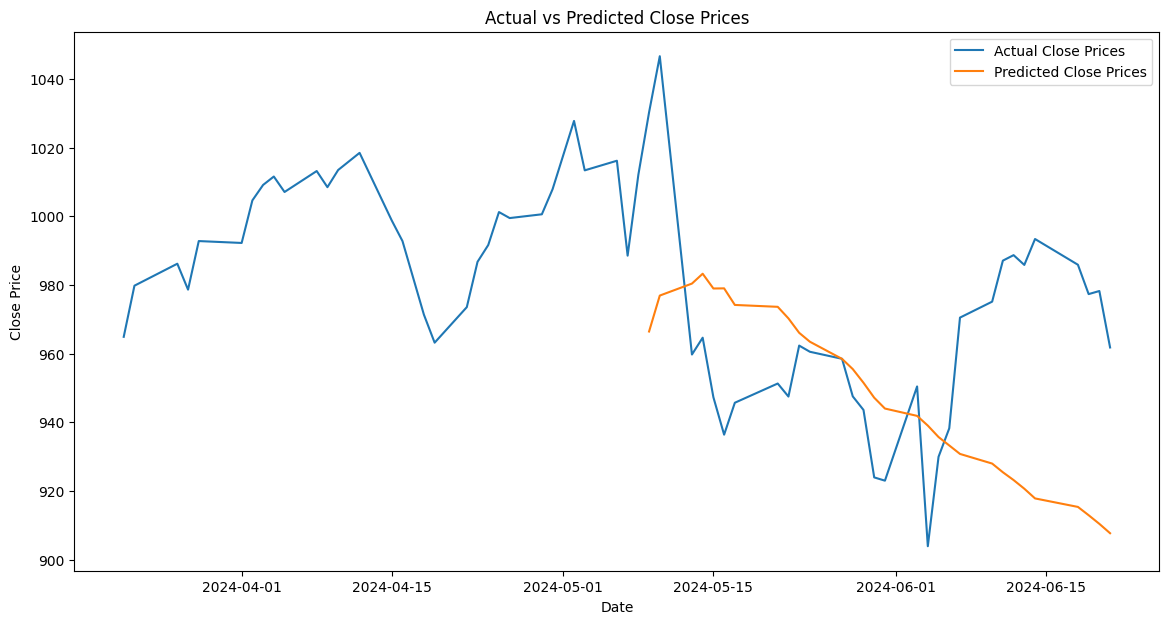

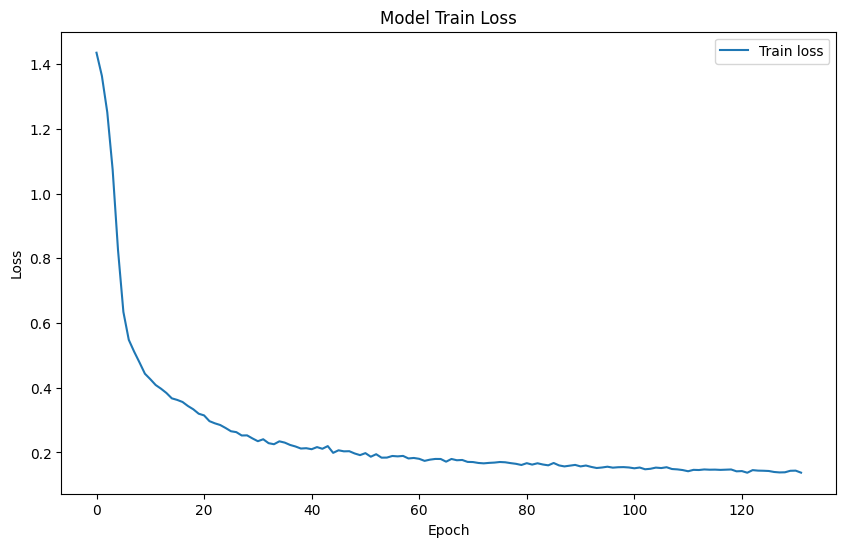

30 30
Actual Open: [1011.       1037.       1005.        965.099976  970.950012  953.200012
  944.        954.        952.        950.        962.5       964.900024
  959.        946.950012  943.5       931.650024  963.        948.
  924.950012  940.        940.        977.        973.799988  994.5
 1002.        990.       1000.        990.        980.        979.      ]
Predicted Open: [971.1871  983.6668  986.0088  990.60376 986.08026 987.1921  981.9709
 981.3301  978.3498  973.5859  970.3639  964.9016  961.7501  957.6297
 953.08466 949.8194  947.6214  944.7303  941.2851  938.77057 936.26184
 933.3649  930.69305 928.29706 925.6524  922.6922  920.07025 917.5338
 914.9313  912.10754]
Mean Absolute Error for Open Prices: 32.39859420520833


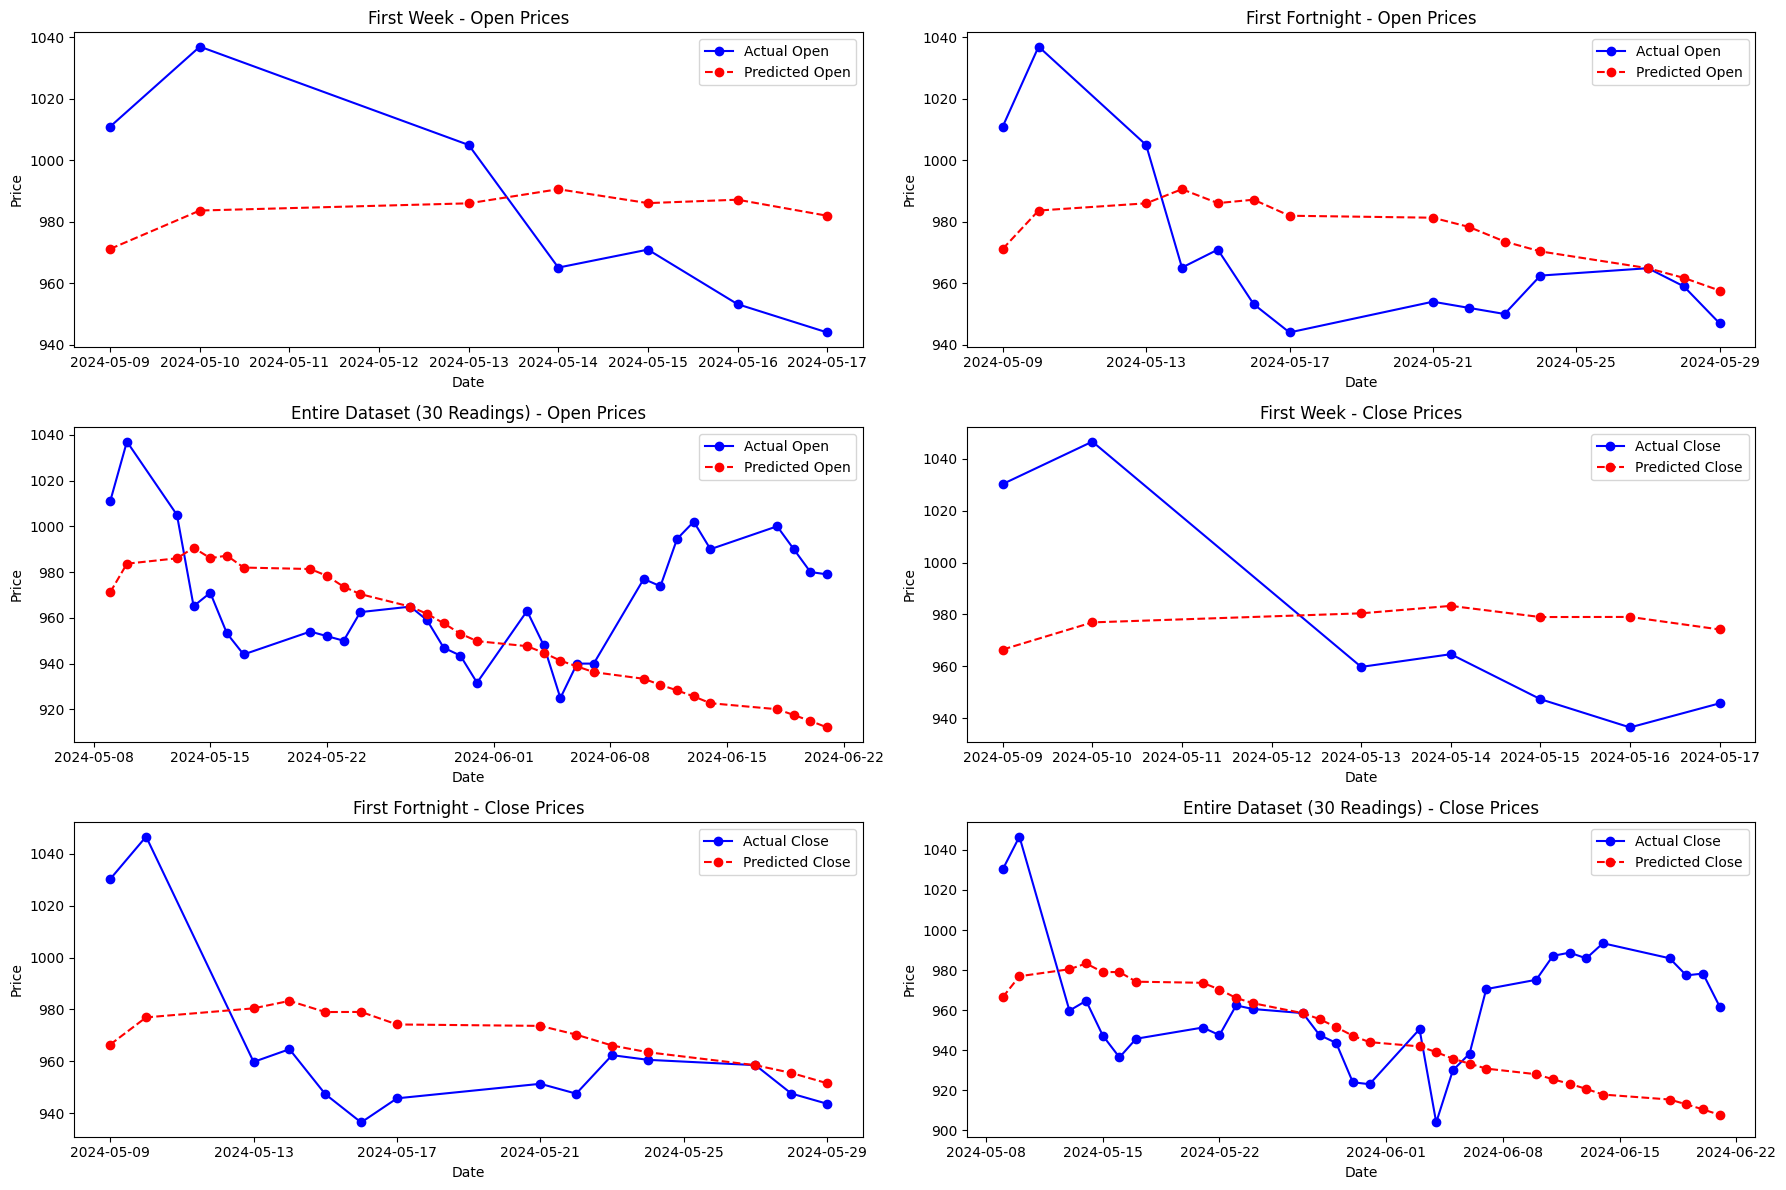

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Bidirectional
from keras.optimizers import Adam
from sklearn.preprocessing import RobustScaler
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error  


df = pd.read_csv("TATAMOTORS.NS2.csv")


df = df.dropna(subset=['Open', 'Close'])


n = 7  
df['% Momentum'] = (df['Close'].diff(n) / df['Close'].shift(n)) * 100 


df['% Momentum'].fillna(0, inplace=True)

df['Returns'] = df['Close'].pct_change()


volatility_window = 10  
df['Volatility'] = df['Returns'].rolling(window=volatility_window).std()


df['Volatility'].fillna(df['Volatility'].mean(), inplace=True)


df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
data = df[['Open', 'Close', '% Momentum', 'Volatility']]


sc = RobustScaler()
data_scaled = sc.fit_transform(data)


time_step = 10


train_data = data_scaled[7000:8426]
test_data = data_scaled[8426:]


def create_sequence(dataset, time_step):
    sequences = []
    labels = []
    for start_idx in range(len(dataset) - time_step):
        end_idx = start_idx + time_step
        sequences.append(dataset[start_idx:end_idx])
        labels.append(dataset[end_idx])
    return np.array(sequences), np.array(labels)

train_seq, train_label = create_sequence(train_data, time_step)

print(f"Train sequences shape: {train_seq.shape}")
print(f"Train labels shape: {train_label.shape}")

model = Sequential()

model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(time_step, train_seq.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Bidirectional(LSTM(50, return_sequences=True)))
model.add(Dropout(0.25))
model.add(Bidirectional(LSTM(50, return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(4))

optimizer = Adam(learning_rate=1e-4, clipvalue=0.5)  
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_absolute_error'])

early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
history = model.fit(train_seq, train_label, epochs=500, batch_size=64, verbose=1, callbacks=[early_stopping])

predictions = []
input_seq = train_data[-time_step:].reshape(1, time_step, train_seq.shape[2])

for _ in range(30):
    predicted = model.predict(input_seq)
    predictions.append(predicted[0])
    input_seq = np.append(input_seq[:, 1:, :], predicted.reshape(1, 1, train_seq.shape[2]), axis=1)

predictions = np.array(predictions)
predictions_inverse = sc.inverse_transform(predictions)

actual_last_30_days = data[-30:]

predicted_dates = actual_last_30_days.index  
predicted_df = pd.DataFrame(predictions_inverse, index=predicted_dates, columns=['Predicted_Open', 'Predicted_Close', 'Predicted_%_Momentum', 'Predicted_Volatility'])

plt.figure(figsize=(14, 7))
plt.plot(df['Close'][-60:], label='Actual Close Prices')
plt.plot(predicted_df['Predicted_Close'], label='Predicted Close Prices')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

def plot_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train loss')
    plt.title('Model Train Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.show()

plot_loss(history)

predicted_open_values = predicted_df['Predicted_Open'].values
actual_open=data['Open'][-30:].values
print(len(actual_open), len(predicted_open_values))

print('Actual Open:', actual_open)
print('Predicted Open:', predicted_open_values)

mae_open = mean_absolute_error(actual_open, predicted_open_values)
print('Mean Absolute Error for Open Prices:', mae_open)
actual_last_30_days = data[-30:]

predicted_dates = actual_last_30_days.index 
predicted_df = pd.DataFrame(predictions_inverse, index=predicted_dates, columns=['Predicted_Open', 'Predicted_Close', 'Predicted_%_Momentum', 'Predicted_Volatility'])

last_30_open = data['Open'][-30:]
last_30_close = data['Close'][-30:]
last_30_momentum = data['% Momentum'][-30:]
last_30_volatility = data['Volatility'][-30:]

predicted_open = predicted_df['Predicted_Open']
predicted_close = predicted_df['Predicted_Close']
predicted_momentum = predicted_df['Predicted_%_Momentum']
predicted_volatility = predicted_df['Predicted_Volatility']
combined_df_open = pd.DataFrame({
    'Open': last_30_open,
    'Predicted_Open': predicted_open
})
combined_df_close = pd.DataFrame({
    'Open': last_30_close,
    'Predicted_Open': predicted_close
})
combined_df_momentum = pd.DataFrame({
    'Open': last_30_momentum,
    'Predicted_Open': predicted_momentum
})
combined_df_volatility = pd.DataFrame({
    'Open': last_30_volatility,
    'Predicted_Open': predicted_volatility
})


plt.figure(figsize=(18, 12))  

# Plot for Open prices
plt.subplot(3, 2, 1)
plt.plot(combined_df_open.index[:7], combined_df_open['Open'][:7], marker='o', linestyle='-', color='b', label='Actual Open')
plt.plot(combined_df_open.index[:7], combined_df_open['Predicted_Open'][:7], marker='o', linestyle='--', color='r', label='Predicted Open')
plt.title('First Week - Open Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(combined_df_open.index[:14], combined_df_open['Open'][:14], marker='o', linestyle='-', color='b', label='Actual Open')
plt.plot(combined_df_open.index[:14], combined_df_open['Predicted_Open'][:14], marker='o', linestyle='--', color='r', label='Predicted Open')
plt.title('First Fortnight - Open Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(combined_df_open.index, combined_df_open['Open'], marker='o', linestyle='-', color='b', label='Actual Open')
plt.plot(combined_df_open.index, combined_df_open['Predicted_Open'], marker='o', linestyle='--', color='r', label='Predicted Open')
plt.title('Entire Dataset (30 Readings) - Open Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Plot for Close prices
plt.subplot(3, 2, 4)
plt.plot(combined_df_close.index[:7], combined_df_close['Open'][:7], marker='o', linestyle='-', color='b', label='Actual Close')
plt.plot(combined_df_close.index[:7], combined_df_close['Predicted_Open'][:7], marker='o', linestyle='--', color='r', label='Predicted Close')
plt.title('First Week - Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(combined_df_close.index[:14], combined_df_close['Open'][:14], marker='o', linestyle='-', color='b', label='Actual Close')
plt.plot(combined_df_close.index[:14], combined_df_close['Predicted_Open'][:14], marker='o', linestyle='--', color='r', label='Predicted Close')
plt.title('First Fortnight - Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(combined_df_close.index, combined_df_close['Open'], marker='o', linestyle='-', color='b', label='Actual Close')
plt.plot(combined_df_close.index, combined_df_close['Predicted_Open'], marker='o', linestyle='--', color='r', label='Predicted Close')
plt.title('Entire Dataset (30 Readings) - Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()

plt.show()


## CNN-BiLSTM-Attention model

## Model Architecture with Attention

### Layers Overview:
1. **Input Layer**:
   - `Input` layer with shape (time_step, number of features).

2. **Convolutional Layers**:
   - `Conv1D` layer with 64 filters, kernel size of 3, and ReLU activation.
   - `MaxPooling1D` layer with pool size of 2.
   - Another `Conv1D` layer with 64 filters, kernel size of 3, and ReLU activation.
   - Another `MaxPooling1D` layer with pool size of 2.

3. **LSTM Layers**:
   - `Bidirectional` LSTM layer with 50 units, returning sequences.
   - Dropout layer with rate 0.25.
   - Another `Bidirectional` LSTM layer with 50 units, returning sequences.
   - Dropout layer with rate 0.5.

4. **Attention Layer**:
   - Custom `AttentionLayer` that applies attention mechanism to the LSTM outputs.

5. **Output Layer**:
   - `Dense` layer with 4 units.

### Compilation:
- Optimizer: Adam with learning rate `1e-4` and gradient clipping (`clipvalue=0.5`).
- Loss function: Mean Squared Error.
- Metric: Mean Absolute Error.

### Utility of the Architecture Explained Simply

- **Convolutional Layers**: 
  - These help identify important patterns in time-based data by using filters to look at small sections of the data. This is great for spotting trends over short periods.

- **Pooling Layers**: 
  - These layers shrink the size of the data and reduce the number of calculations needed, which helps avoid overfitting and makes the model faster.

- **Bidirectional LSTM Layers**: 
  - These look at the data in both forward and backward directions, helping the model understand the full context of the time series.

- **Attention Layer**: 
  - This layer improves the model's focus on the most important parts of the data, making predictions more accurate by catching key time-based details.

- **Dropout Layers**: 
  - These layers help prevent overfitting by randomly turning off some parts of the model during training, making it more robust.

- **Dense Output Layer**: 
  - This final layer gives the model’s predictions, with the number of outputs matching the features being predicted, like Open, Close, % Momentum, and Volatility.




C:\Users\iamha\AppData\Local\Temp\ipykernel_5752\1059449957.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['% Momentum'].fillna(0, inplace=True)
C:\Users\iamha\AppData\Local\Temp\ipykernel_5752\1059449957.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

Train sequences shape: (1416, 10, 4)
Train labels shape: (1416, 4)
Epoch 1/500


c:\Program Files\Python312\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis 1 of a tensor of shape (None, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 1.4276 - mean_absolute_error: 0.8618
Epoch 2/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3930 - mean_absolute_error: 0.8603
Epoch 3/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3582 - mean_absolute_error: 0.8357
Epoch 4/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2247 - mean_absolute_error: 0.7987
Epoch 5/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1169 - mean_absolute_error: 0.7554
Epoch 6/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8046 - mean_absolute_error: 0.6344
Epoch 7/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6139 - mean_absolute_error: 0.5247
Epoch 8/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5393 - mean_absolute_error: 0.4809
Epoch 9/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4704 - mean_absolute_error: 0.4448
Epoch 10/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4324 - mean_absolute_error: 0.4312
Epoch 11/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

c:\Program Files\Python312\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis 1 of a tensor of shape (1, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━

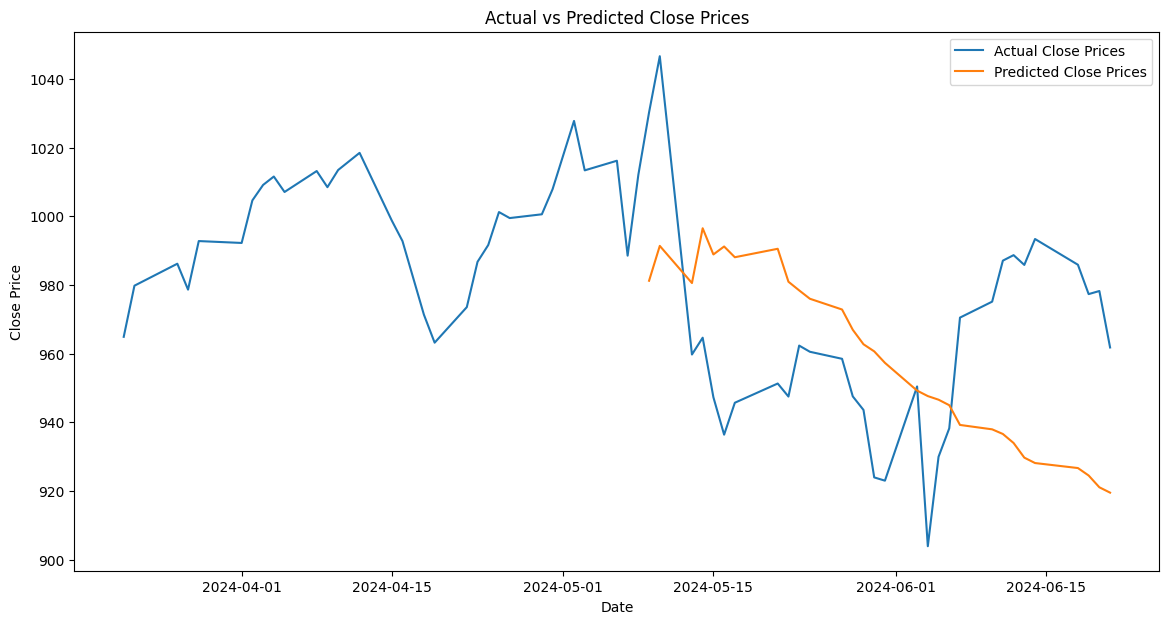

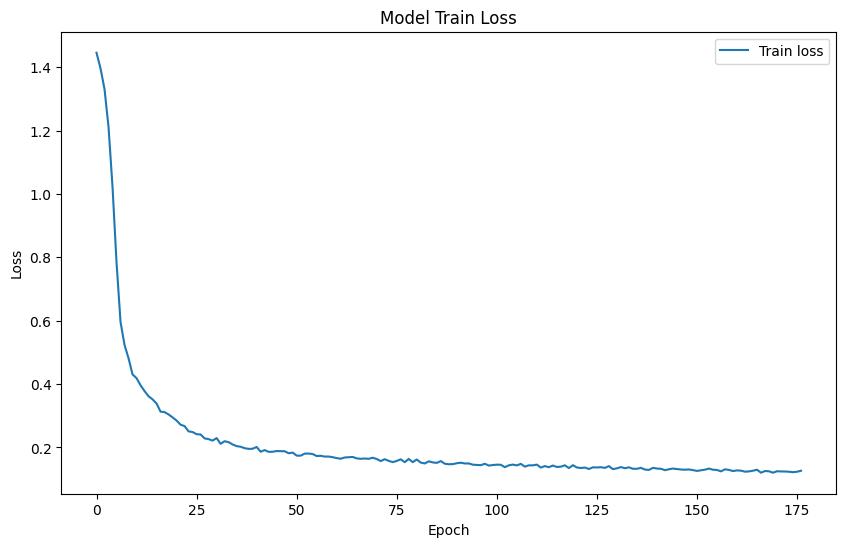

30 30
Actual Open: [1011.       1037.       1005.        965.099976  970.950012  953.200012
  944.        954.        952.        950.        962.5       964.900024
  959.        946.950012  943.5       931.650024  963.        948.
  924.950012  940.        940.        977.        973.799988  994.5
 1002.        990.       1000.        990.        980.        979.      ]
Predicted Open: [982.9737  993.70526 983.00665 999.66425 991.35046 994.0082  990.6124
 993.81934 983.7056  981.0926  978.4288  975.1391  968.9376  964.5187
 962.56256 959.18896 950.93933 949.3378  948.3199  946.7269  940.80914
 939.52124 938.224   935.52155 931.1509  929.54846 928.0992  925.85236
 922.3523  920.7921 ]
Mean Absolute Error for Open Prices: 33.27117517851562


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Bidirectional, Input, Layer
from keras.optimizers import Adam
from sklearn.preprocessing import RobustScaler
from keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.metrics import mean_absolute_error

df = pd.read_csv("TATAMOTORS.NS2.csv")

df = df.dropna(subset=['Open', 'Close'])


n = 7  
df['% Momentum'] = (df['Close'].diff(n) / df['Close'].shift(n)) * 100 

df['% Momentum'].fillna(0, inplace=True)


df['Returns'] = df['Close'].pct_change()


volatility_window = 10  
df['Volatility'] = df['Returns'].rolling(window=volatility_window).std()


df['Volatility'].fillna(df['Volatility'].mean(), inplace=True)


df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
data = df[['Open', 'Close', '% Momentum', 'Volatility']]


sc = RobustScaler()
data_scaled = sc.fit_transform(data)


time_step = 10


train_data = data_scaled[7000:8426]
test_data = data_scaled[8426:]


def create_sequence(dataset, time_step):
    sequences = []
    labels = []
    for start_idx in range(len(dataset) - time_step):
        end_idx = start_idx + time_step
        sequences.append(dataset[start_idx:end_idx])
        labels.append(dataset[end_idx])
    return np.array(sequences), np.array(labels)


train_seq, train_label = create_sequence(train_data, time_step)


print(f"Train sequences shape: {train_seq.shape}")
print(f"Train labels shape: {train_label.shape}")

class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name='attention_weight', 
                                 shape=(input_shape[-1], input_shape[-1]),
                                 initializer='glorot_uniform',
                                 trainable=True)
        self.b = self.add_weight(name='attention_bias', 
                                 shape=(input_shape[-1],),
                                 initializer='zeros',
                                 trainable=True)
        self.dense = tf.keras.layers.Dense(1)
        super(AttentionLayer, self).build(input_shape)

    def call(self, inputs):
        e = tf.keras.activations.tanh(tf.tensordot(inputs, self.W, axes=1) + self.b)
        e = self.dense(e)
        e = tf.keras.activations.softmax(e, axis=1)
        output = inputs * e
        return tf.reduce_sum(output, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0], input_shape[-1]


input_layer = Input(shape=(time_step, train_seq.shape[2]))


x = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
x = MaxPooling1D(pool_size=2)(x)
x = Conv1D(filters=64, kernel_size=3, activation='relu')(x)
x = MaxPooling1D(pool_size=2)(x)


x = Bidirectional(LSTM(50, return_sequences=True))(x)
x = Dropout(0.25)(x)
x = Bidirectional(LSTM(50, return_sequences=True))(x)
x = Dropout(0.5)(x)


attention = AttentionLayer()(x)


output_layer = Dense(4)(attention)

model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

optimizer = Adam(learning_rate=1e-4, clipvalue=0.5)
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_absolute_error'])


early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
history = model.fit(train_seq, train_label, epochs=500, batch_size=64, verbose=1, callbacks=[early_stopping])


predictions = []
input_seq = train_data[-time_step:].reshape(1, time_step, train_seq.shape[2])

for _ in range(30):
    predicted = model.predict(input_seq)
    predictions.append(predicted[0])
    input_seq = np.append(input_seq[:, 1:, :], predicted.reshape(1, 1, train_seq.shape[2]), axis=1)


predictions = np.array(predictions)
predictions_inverse = sc.inverse_transform(predictions)


actual_last_30_days = data[-30:]


predicted_dates = actual_last_30_days.index
predicted_df = pd.DataFrame(predictions_inverse, index=predicted_dates, columns=['Predicted_Open', 'Predicted_Close', 'Predicted_%_Momentum', 'Predicted_Volatility'])


plt.figure(figsize=(14, 7))
plt.plot(df['Close'][-60:], label='Actual Close Prices')
plt.plot(predicted_df['Predicted_Close'], label='Predicted Close Prices')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


def plot_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train loss')
    plt.title('Model Train Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.show()

plot_loss(history)


predicted_open_values = predicted_df['Predicted_Open'].values
actual_open=data['Open'][-30:].values

print(len(actual_open), len(predicted_open_values))


print('Actual Open:', actual_open)
print('Predicted Open:', predicted_open_values)


mae_open = mean_absolute_error(actual_open, predicted_open_values)
print('Mean Absolute Error for Open Prices:', mae_open)
